In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
# rc('text', usetex=True)
# rc('font', weight='bold')
# custom_preamble = {
#     "text.latex.preamble":
#         r"\usepackage{amsmath,amssymb}" # for the align, center,... environment
#         ,
#     }
# plt.rcParams.update(custom_preamble)
from matplotlib.colors import to_rgba
from matplotlib.patches import Circle
import numpy as np


In [2]:
class box_plotter:
    def __init__(self, Lx, Ly, out_image):
        '''Initializes the box plotter with the boundary
        Lx [float]: length of the box in the x direction
            Ly [float]: length of the box in the y direction'''
        self.fig, self.ax = plt.subplots(dpi=100)
        #remove self.axes
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.ax.set_aspect('equal', adjustable='box')
        self.ax.set_xlim(0, Lx)
        self.ax.set_ylim(0, Ly)
        self.out_image = out_image

    def plot_spheres(self, inner_spheres, boundary_spheres):
        '''plots the spheres
        inner_spheres [3xN np.array]: positions of the inner spheres with their radii as the third column
        boundary_spheres [3xN np.array]: positions of the boundary spheres with their radii as the third column'''
        #plot boundary spheres
        for [x,y,r] in boundary_spheres:
           self.ax.add_patch(Circle([x,y], r,  fill=None, edgecolor='k'))
        #plot interior spheres
        #generate colors
        color = {r: to_rgba(f"C{i}") for i, r in enumerate(np.unique(inner_spheres[:, 2]))}
        for j, [x,y,r] in enumerate(inner_spheres):
            #plot the sphere number at the center
            self.ax.text(x, y, j, horizontalalignment='center', verticalalignment='center', fontsize=6)
            self.ax.add_patch(Circle([x,y], r,  fill=None, edgecolor=color[r], alpha=0.5))
            if y + r > Ly:
               self.ax.add_patch(Circle([x, y-Ly], r,  fill=None, edgecolor=color[r], linestyle='--', alpha=0.5))
            if y - r < 0:
               self.ax.add_patch(Circle([x, y+Ly], r,  fill=None, edgecolor=color[r], linestyle='--', alpha=0.5))

        self.fig.savefig(self.out_image, dpi=200)
        plt.close(self.fig)

In [6]:
r1 = 1
r2 = 1.4*r1
Lx = 30
Ly = 15

#place input boundary spheres:
boundary_sphere_radius = 1
boundary_sphere_gap = 0 # gap between boundary spheres 
distance_between_spheres = 2*boundary_sphere_radius + boundary_sphere_gap
input_node_pos = np.array([[0, a] for a in np.arange(0, Ly, distance_between_spheres)])


#place output boundary spheres:
boundary_sphere_radius = 1
boundary_sphere_gap = 0 # gap between boundary spheres 
distance_between_spheres = 2*boundary_sphere_radius + boundary_sphere_gap
output_node_pos = np.array([[Lx, a] for a in np.arange(0, Ly, distance_between_spheres)])

boundary_spheres_locs = np.vstack((input_node_pos, output_node_pos))
boundary_sphere_radii = boundary_sphere_radius*np.ones(len(boundary_spheres_locs))
boundary_spheres = np.column_stack((boundary_spheres_locs, boundary_sphere_radii))


#place interior spheres on a grid:
n_spheres = 50
d =  0.9*(Lx*Ly/(2*n_spheres))**0.5#(r1 + r2)/1.02
print((r1+r2)/d)
start = 0.9*boundary_sphere_radius 
interior_grid = np.mgrid[start:Lx:d, start:Ly:d].reshape(2,-1).T
p = 0.6
radii = np.random.choice([r1, r2], size=2*n_spheres, p=[1-p, p])
selected_indices = np.random.choice(range(len(interior_grid)), size=2*n_spheres, replace=False)
inner_sphere_locs = interior_grid[selected_indices]
inner_spheres = np.column_stack((inner_sphere_locs, radii))


plotter = box_plotter(Lx, Ly, 'box.png')
plotter.plot_spheres(inner_spheres, boundary_spheres)

1.257078722109418


In [4]:
plotter = box_plotter(Lx, Ly, 'box.png')
plotter.plot_spheres(inner_spheres, boundary_spheres)


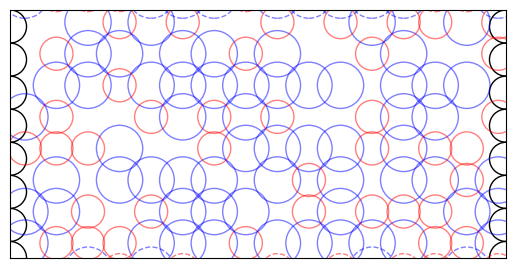

In [5]:
# state of the system is a dataframe where each row is the postion of the particle, type of sphere, radius of sphere
# the boundary of the box is another dataframe where each row is the position of the boundary, type of boundary, radius of boundary
from matplotlib.patches import Circle, Rectangle
fig, ax = plt.subplots(dpi=100)
#remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
#plot boundary spheres
for pos in input_node_pos:
    ax.add_patch(Circle(pos, boundary_sphere_radius,  fill=None, edgecolor='k'))
for pos in output_node_pos:
    ax.add_patch(Circle(pos, boundary_sphere_radius,  fill=None, edgecolor='k'))
#plot interior spheres
color = {r1:'r', r2:'b'}
for j, pos in enumerate(inner_sphere_locs):
    ax.add_patch(Circle(pos, radii[j],  fill=None, edgecolor=color[radii[j]], alpha=0.5))
    if pos[1] + radii[j] > Ly:
        ax.add_patch(Circle([pos[0], pos[1]-Ly], radii[j],  fill=None, edgecolor=color[radii[j]], linestyle='--', alpha=0.5))
    if pos[1] - radii[j] < 0:
        ax.add_patch(Circle([pos[0], pos[1]+Ly], radii[j],  fill=None, edgecolor=color[radii[j]], linestyle='--', alpha=0.5))

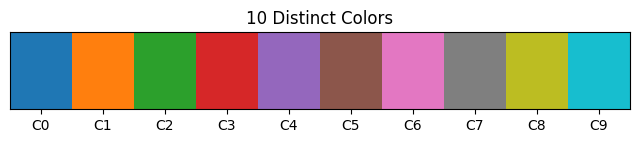

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Number of colors to generate
N = 10

# Generate N distinct colors
colors = [to_rgba(f"C{i}") for i in range(N)]

# Display the colors
fig, ax = plt.subplots(1, 1, figsize=(8, 1))
ax.imshow([colors], aspect='auto', extent=(0, N, 0, 1))
ax.set_xticks(np.arange(N) + 0.5)
ax.set_xticklabels([f'C{i}' for i in range(N)])
ax.set_yticks([])
ax.set_title(f'{N} Distinct Colors')
plt.show()


In [7]:
a = np.random.uniform(size=(10, 3))
for j, [pos,r] in enumerate(a):
    print(pos)

ValueError: too many values to unpack (expected 2)

NameError: name 'Lx' is not defined

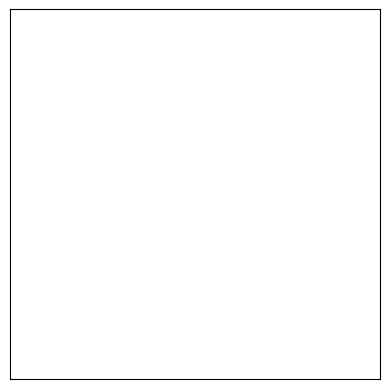

In [ ]:
# state of the system is a dataframe where each row is the postion of the particle, type of sphere, radius of sphere
# the boundary of the box is another dataframe where each row is the position of the boundary, type of boundary, radius of boundary
from matplotlib.patches import Circle, Rectangle
fig, ax = plt.subplots(dpi=100)
#remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
#plot boundary spheres
for pos in input_node_pos:
    ax.add_patch(Circle(pos, boundary_sphere_radius,  fill=None, edgecolor='k'))
for pos in output_node_pos:
    ax.add_patch(Circle(pos, boundary_sphere_radius,  fill=None, edgecolor='k'))
#plot interior spheres
L = len(inner_sphere_locs)
color = {r1:'r', r2:'b'}
for j, pos in enumerate(inner_sphere_locs):
        ax.add_patch(Circle(pos, radii[j],  fill=None, edgecolor=color[radii[j]]))
